### Problem Statement 
In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 

The  description of the dataset is as follows: 

Data Set Information: 

Extraction was done by Barry Becker from the 1994 Census  database. A set of reasonably clean records was extracted using the  following conditions: ((AAGE>16) && (AGI>100) &&  (AFNLWGT>1)&& (HRSWK>0))

Attribute Information: 

* Listing of attributes: >50K, <=50K. 
* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,  Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: continuous. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school,  Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,  Doctorate, 5th-6th, Preschool. 
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married,  Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,  Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,  Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,  Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: continuous. 
* capital-loss: continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico,  Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,  Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,  Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,  Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,  Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Following is the code to load required 

libraries and data: 

>import numpy as np 
import pandas as pd 
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine learning-databases/adult/adult.dat a', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning databases/adult/adult.test' , skiprows = 1, header = None) 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',  'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain',  'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
train_set.columns = col_labels 
test_set.columns = col_labels 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
#columns name according to adult.names
cols=["age","workclass","fnlwgt","education","education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country","wage_class"]

train_set=pd.read_csv(url, names=cols)   # reading and setting names

train_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",skiprows = 1, header = None, names=cols)   #coz row one is multi index 

test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## EDA

In [4]:
train_set.isnull().sum()
   # no null values in any frame

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

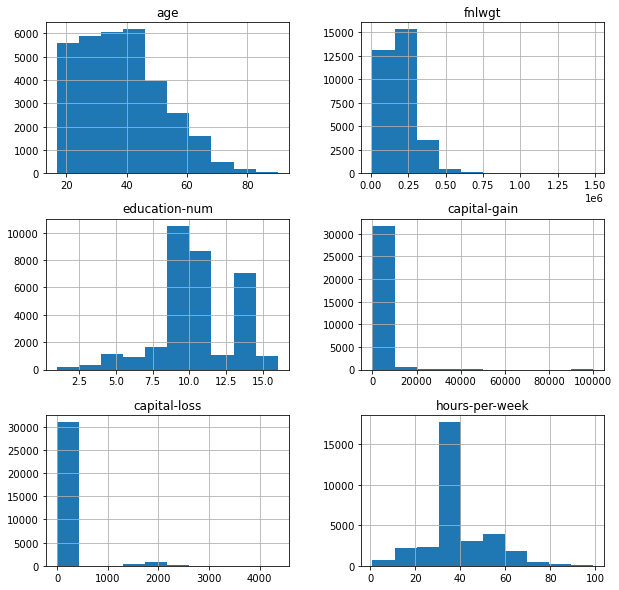

In [5]:
train_set.hist(figsize=(10,10))
plt.show()

In [6]:
train_set.dtypes  
#only 6 features(out of 14 are numeric)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage_class        object
dtype: object

##### checking uniqe values and count of them in each columns having type as object

In [7]:

train_set.workclass.value_counts()
#train_set.workclass.unique()       

# there is a '?'  need to be handle

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
for feature in cols:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())
        

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital-status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

**Observation:** features `Native_counrty, Occupation, workclass` having '?' as one value need to be handle

get index of the ? in the above mentioned columns

#### some features name containing `-` in the name remove or replace with `underscore`

In [9]:
train_set.columns  

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage_class'],
      dtype='object')

##### using regular expression

In [10]:
import re
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)  

In [11]:
filter1 = train_set["workclass"]=="?"
#index= train_set.where(filter1).index
index = train_set[train_set["native_country"]== ' ?'].index
#index.value_counts()  # to display all the indexes having value '?'
index.value_counts().sum()  # sum of those indexes 
# type(index)

583

In [12]:
#now apply the filter for the '?' value in those above 3 columns

indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)


__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


**Observation:** Max % of having `?` is 5.66 we can drop and can check how much it is affedting our data

In [13]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])


Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [14]:
print('\n Drowping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])



 Drowping `?` indexes from `workclass` featutre....
Total New rows: 31978


In [15]:
print('\n Drowping `?` indexes from `native_country` featutre....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])



 Drowping `?` indexes from `native_country` featutre....
Total New rows: 31978


In [16]:
print('\n Drowping `?` indexes from `occupation` featutre....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])



 Drowping `?` indexes from `occupation` featutre....
Total New rows: 30162


In [17]:
# check for '?' again
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


**Note:** As XGBoost dnt support categorical data we need to use one hot coding tochange all object type features to numeric

#### Applying one hot coding to all the categorical variables

In [18]:
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])


In [19]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [20]:
print(df1.shape)
print(df2.shape)

(30162, 98)
(30162, 6)


## Concatinating the two frames 

In [21]:
X_train = pd.concat([df1, df2], axis=1)

In [22]:
X_train.shape   # final dataframe to be get Trained 

(30162, 104)

In [23]:
y=train_set[objectFeature[-1]]


### Using LabelEncoder over the target variable

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(y)
# le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [25]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

same process we can apply with the test data to prepare it for test input, secondly we have combined both and performed same operations and later divied again into train and test split


i am using same from the training portion to demonstrate model

# Applying XGB

In [47]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [28]:
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)

In [29]:
x_train.shape, x_test.shape, y_t1.shape, y_t2.shape

((22621, 104), (7541, 104), (22621,), (7541,))

#### Model Training : making model 1

In [30]:
xgb = XGBClassifier(**params).fit(x_train,y_t1)

[16:55:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [31]:
y_pred= xgb.predict(x_test)

In [32]:
accuracy_score(y_t2, y_pred)

0.8648720328868851

In [48]:
confusion_matrix(y_t2, y_pred)

array([[5372,  345],
       [ 674, 1150]], dtype=int64)